In [1]:
pip install pandas numpy matplotlib seaborn wordcloud


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 2: Load Data
df = pd.read_csv('netflix1.csv')
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Check for null values
df.isnull().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Replace missing 'country', 'director', etc., with 'Not Given'
df.fillna({'country': 'Not Given', 'director': 'Not Given'}, inplace=True)

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Check data types
df.dtypes


show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

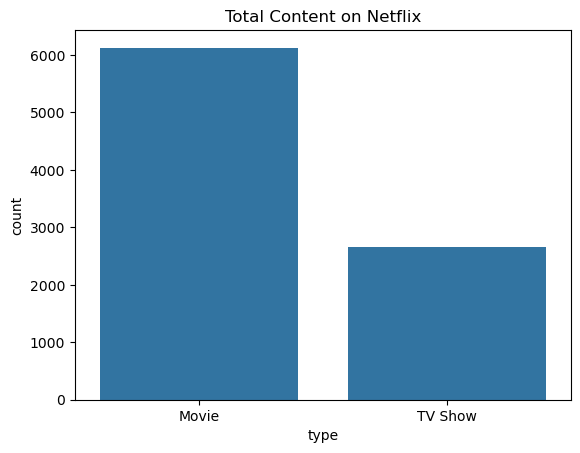

In [4]:
sns.countplot(data=df, x='type')
plt.title('Total Content on Netflix')
plt.show()


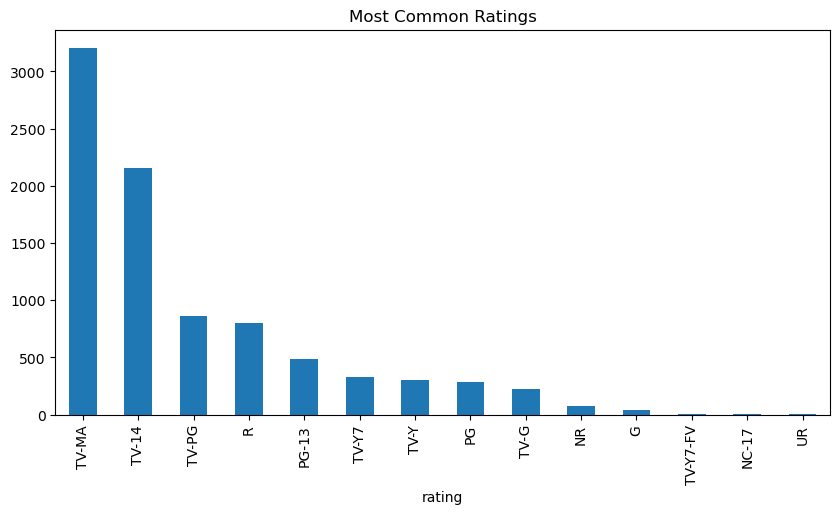

In [5]:
df['rating'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Most Common Ratings')
plt.show()


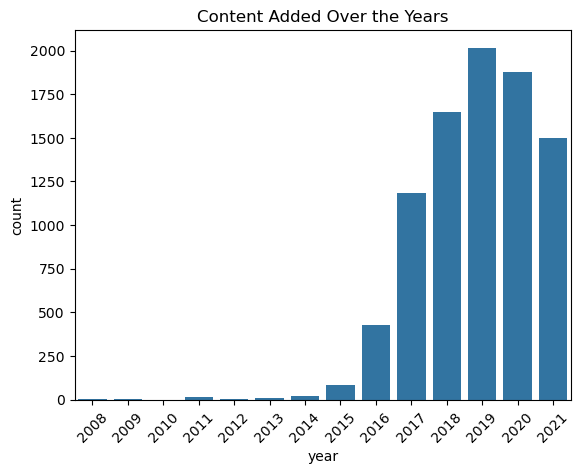

In [6]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

# Yearly Trend
sns.countplot(data=df, x='year')
plt.xticks(rotation=45)
plt.title('Content Added Over the Years')
plt.show()


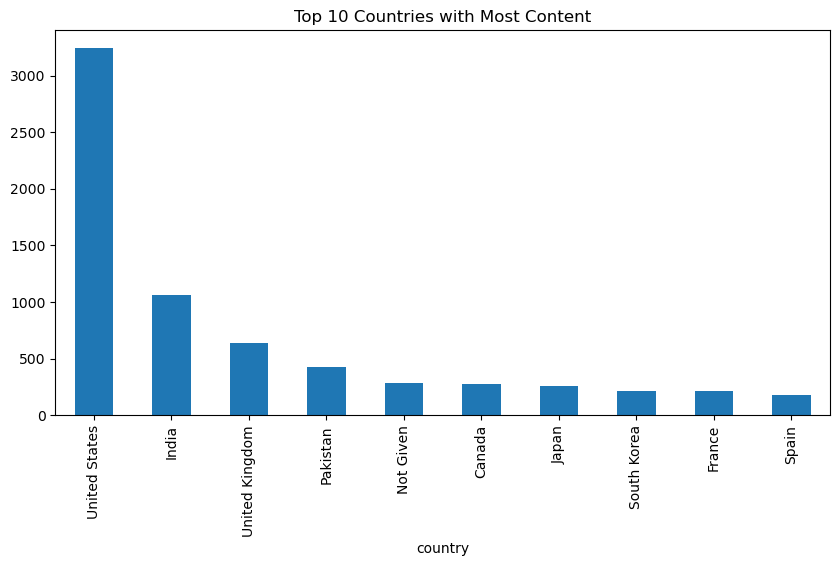

In [7]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries with Most Content')
plt.show()


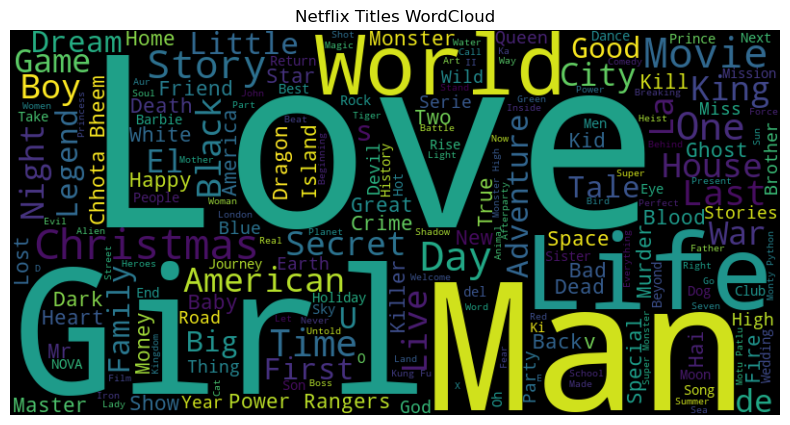

In [8]:
titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Titles WordCloud')
plt.show()


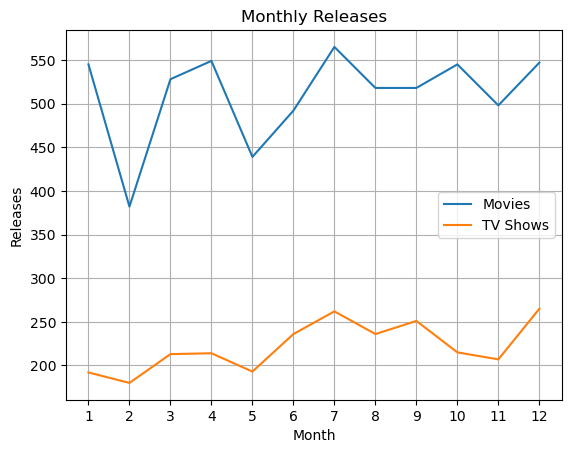

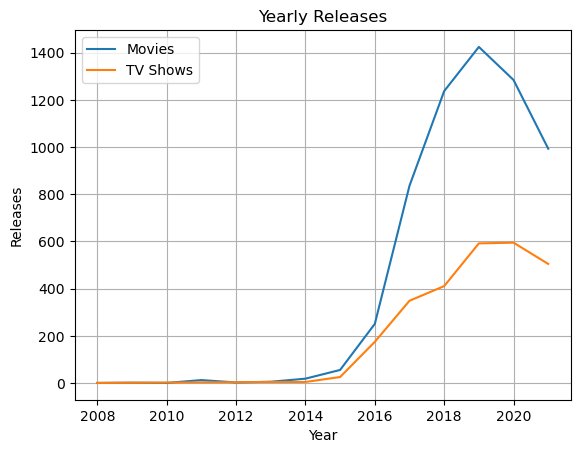

In [9]:
movies = df[df['type'] == 'Movie']
shows = df[df['type'] == 'TV Show']

# Monthly Releases
monthly_movies = movies['month'].value_counts().sort_index()
monthly_shows = shows['month'].value_counts().sort_index()

plt.plot(monthly_movies.index, monthly_movies.values, label='Movies')
plt.plot(monthly_shows.index, monthly_shows.values, label='TV Shows')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Releases')
plt.legend()
plt.title('Monthly Releases')
plt.grid(True)
plt.show()

# Yearly Releases
yearly_movies = movies['year'].value_counts().sort_index()
yearly_shows = shows['year'].value_counts().sort_index()

plt.plot(yearly_movies.index, yearly_movies.values, label='Movies')
plt.plot(yearly_shows.index, yearly_shows.values, label='TV Shows')
plt.xlabel('Year')
plt.ylabel('Releases')
plt.title('Yearly Releases')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
df.to_csv('netflix_cleaned.csv', index=False)


In [12]:
df.to_csv('netflix_cleaned.csv', index=False)


In [13]:
import os
print(os.getcwd())


C:\Users\Riya


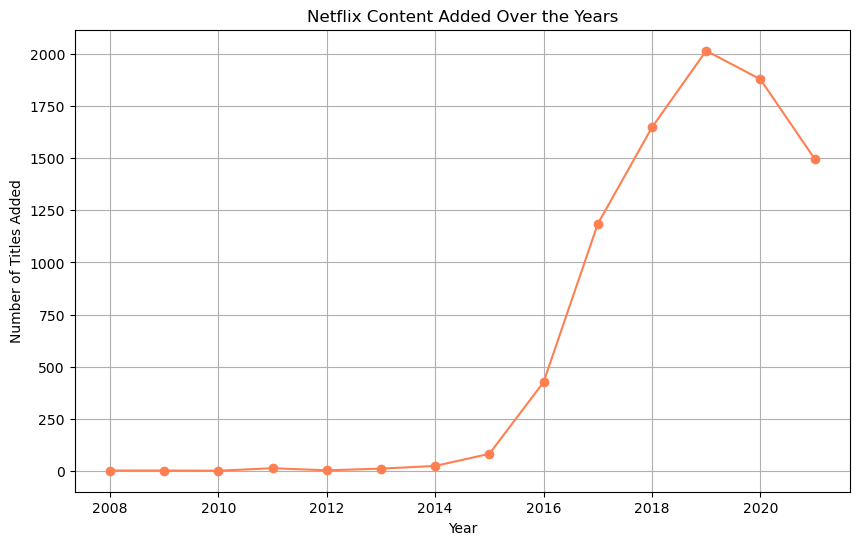

In [21]:
# Convert 'date_added' column to datetime if not already
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Line chart of content additions over years
plt.figure(figsize=(10,6))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='coral')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.savefig("figure2_yearly_content_trend.png")
plt.show()


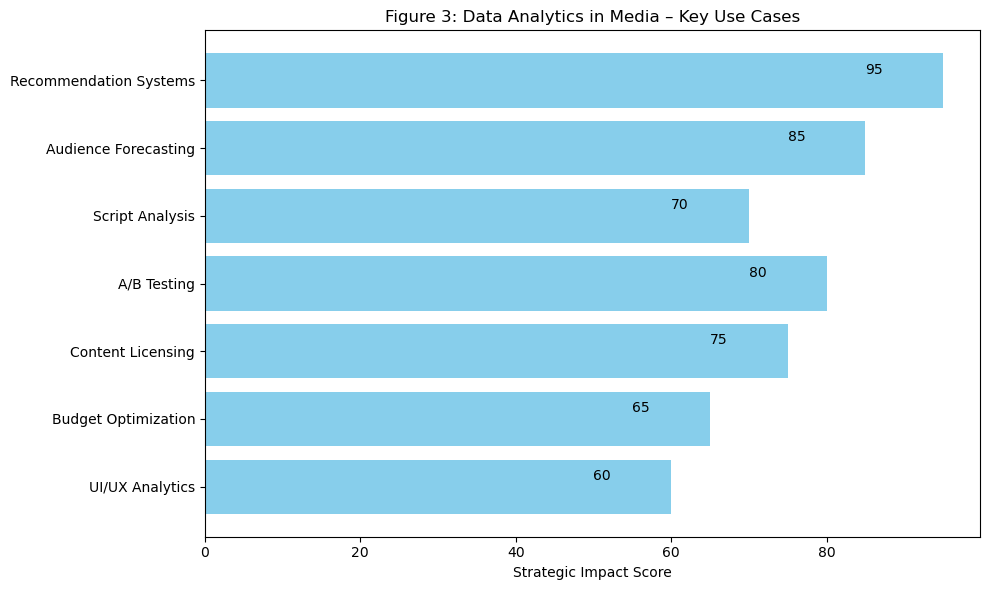

In [22]:
import matplotlib.pyplot as plt

use_cases = [
    'Recommendation Systems',
    'Audience Forecasting',
    'Script Analysis',
    'A/B Testing',
    'Content Licensing',
    'Budget Optimization',
    'UI/UX Analytics'
]

importance_score = [95, 85, 70, 80, 75, 65, 60]

plt.figure(figsize=(10,6))
bars = plt.barh(use_cases, importance_score, color='skyblue')
plt.xlabel('Strategic Impact Score')
plt.title('Figure 3: Data Analytics in Media – Key Use Cases')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() - 10, bar.get_y() + 0.3,
             str(bar.get_width()), color='black')

plt.tight_layout()
plt.show()


In [25]:
print(df.columns.tolist())


['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


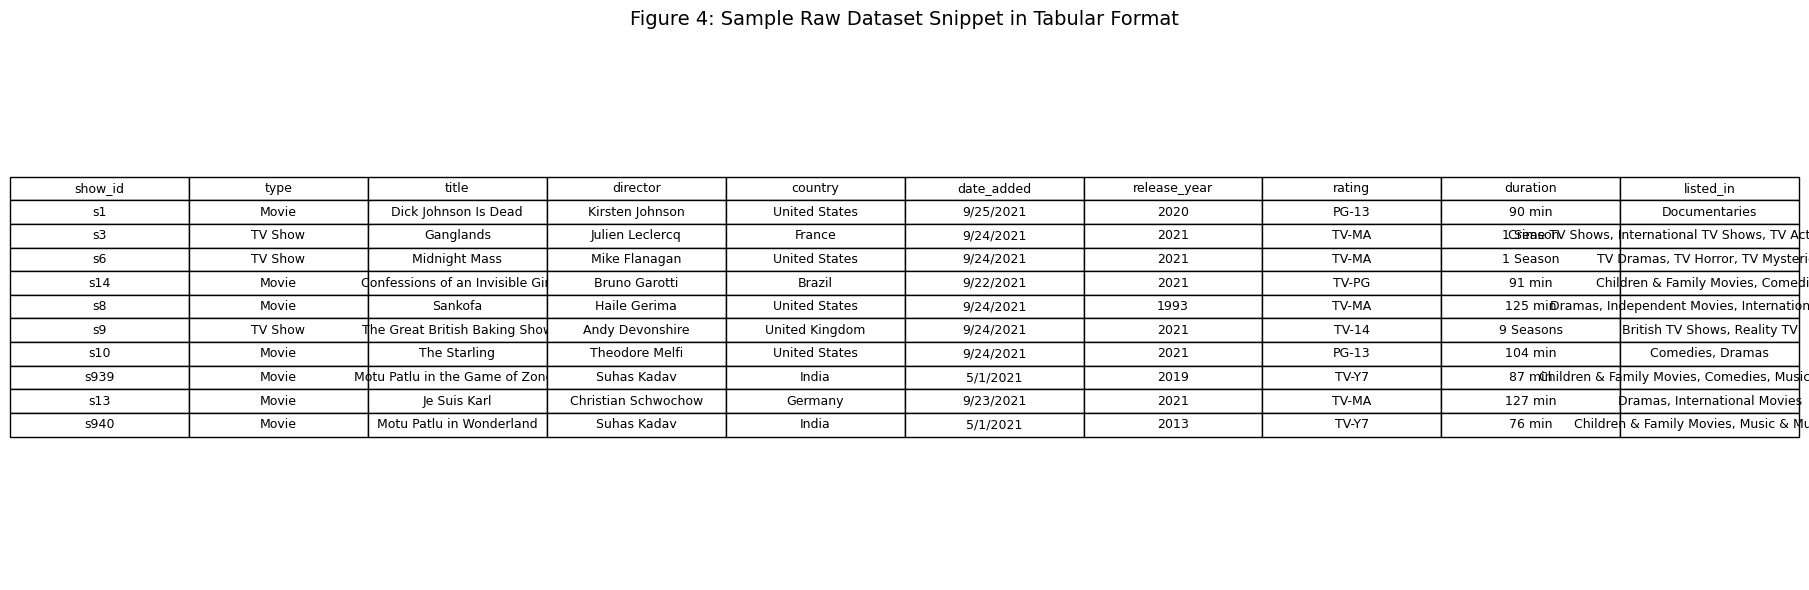

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("netflix1.csv")

# Strip any extra spaces just in case
df.columns = df.columns.str.strip()

# Select only the available columns (based on your confirmation)
columns = ['show_id', 'type', 'title', 'director', 'country',
           'date_added', 'release_year', 'rating', 'duration', 'listed_in']

# Create a 10-row sample
sample_df = df[columns].head(10)

# Plot the sample as a table
fig, ax = plt.subplots(figsize=(18, 6))
ax.axis('off')

table = ax.table(cellText=sample_df.values,
                 colLabels=sample_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.2)

# Add title and save
plt.title("Figure 4: Sample Raw Dataset Snippet in Tabular Format", fontsize=14)
plt.tight_layout()
plt.savefig("Figure4_Raw_Dataset_Table.png", dpi=300)
plt.show()


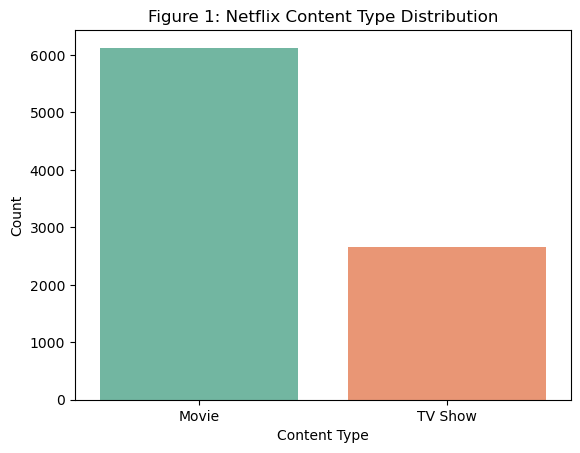

In [29]:
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Figure 1: Netflix Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


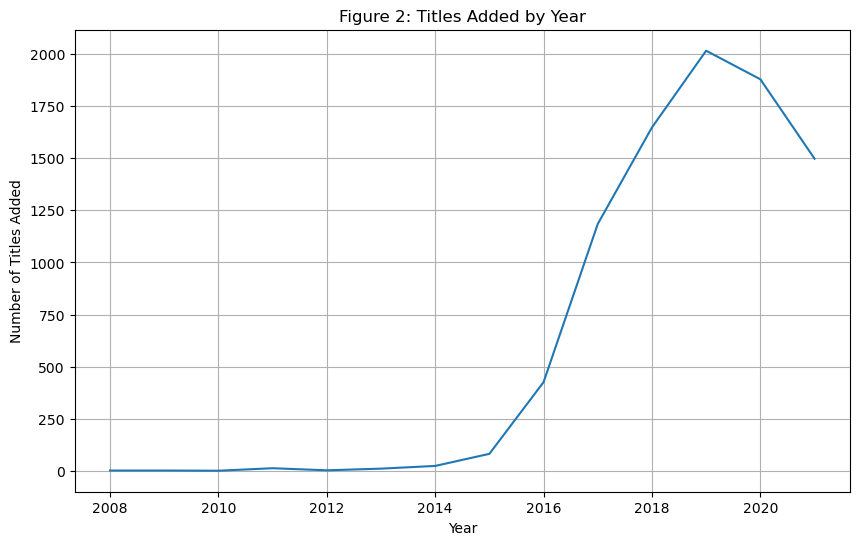

In [30]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title('Figure 2: Titles Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


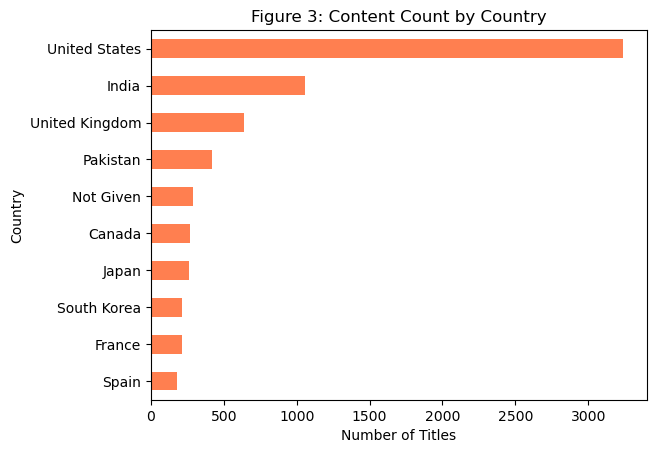

In [31]:
country_count = df['country'].value_counts().head(10)
country_count.sort_values().plot(kind='barh', color='coral')
plt.title('Figure 3: Content Count by Country')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


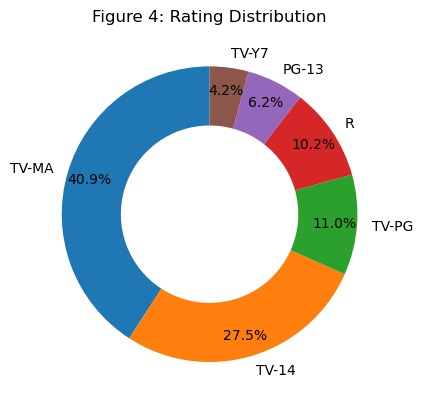

In [32]:
rating_counts = df['rating'].value_counts().head(6)
rating_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85,
                   wedgeprops=dict(width=0.4))
plt.title('Figure 4: Rating Distribution')
plt.ylabel('')
plt.show()


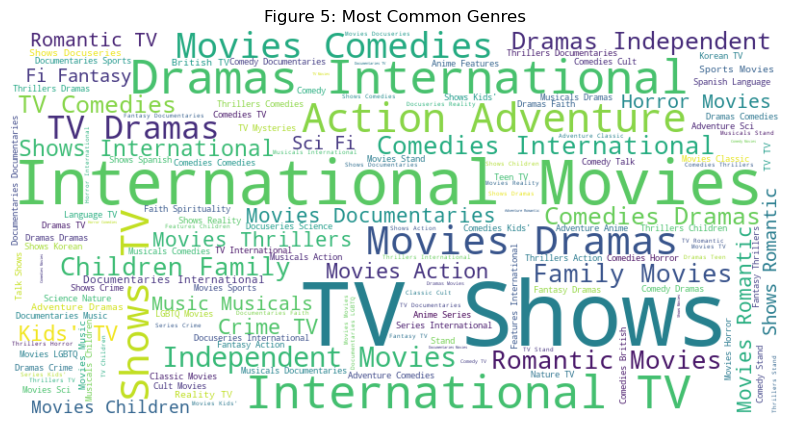

In [33]:
from wordcloud import WordCloud
all_genres = ', '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Figure 5: Most Common Genres')
plt.show()


C:\Users\Riya\AppData\Local\Temp\ipykernel_51460\3925454574.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Genre', y='Count', palette='pastel')


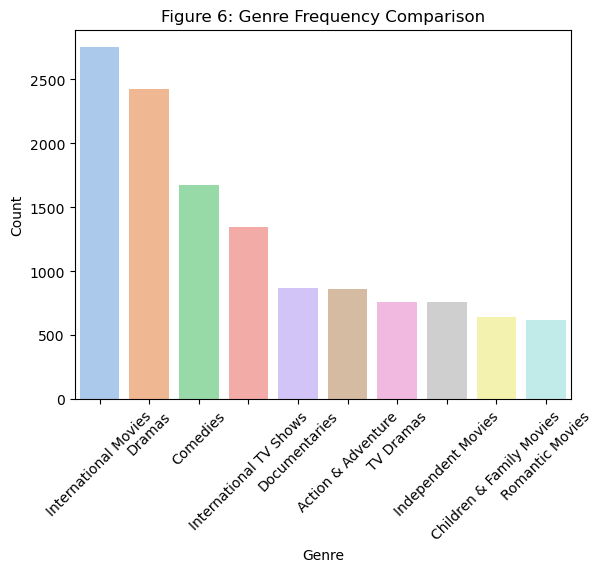

In [34]:
from collections import Counter

genre_split = df['listed_in'].str.split(', ')
genre_counts = Counter([genre for sublist in genre_split.dropna() for genre in sublist])
genre_df = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=genre_df, x='Genre', y='Count', palette='pastel')
plt.xticks(rotation=45)
plt.title('Figure 6: Genre Frequency Comparison')
plt.show()


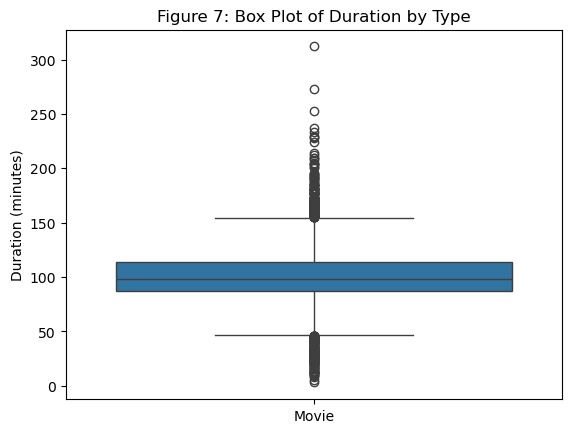

In [35]:
# Convert duration to numeric for movies
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_num'] = movie_df['duration'].str.replace(' min', '').astype(float)

sns.boxplot(data=movie_df, x='type', y='duration_num')
plt.title('Figure 7: Box Plot of Duration by Type')
plt.ylabel('Duration (minutes)')
plt.xlabel('')
plt.show()


In [39]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_lr = lr.predict(X_test)

# Step 4: Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9965870307167235

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       0.99      1.00      0.99       520

    accuracy                           1.00      1758
   macro avg       0.99      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758

Confusion Matrix:
 [[1233    5]
 [   1  519]]


In [41]:
print(df.columns.tolist())


['type', 'release_year', 'rating', 'duration', 'type_encoded', 'rating_encoded']


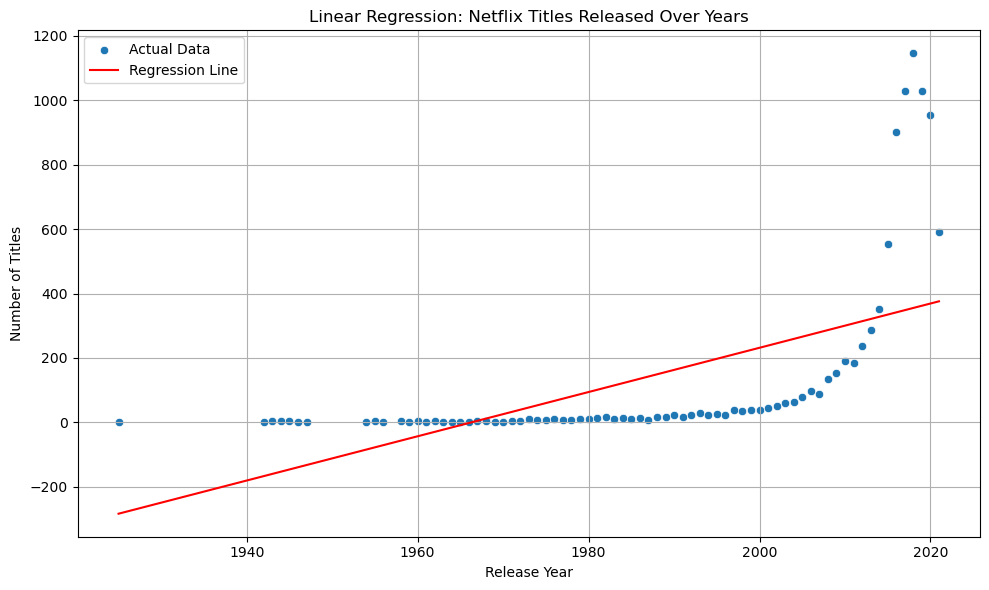

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Group the data by release_year
grouped = df.groupby('release_year').size().reset_index(name='title_count')

# Prepare X and y
X = grouped[['release_year']]
y = grouped['title_count']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='title_count', data=grouped, label='Actual Data')
plt.plot(grouped['release_year'], y_pred, color='red', label='Regression Line')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Linear Regression: Netflix Titles Released Over Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       0.99      1.00      0.99       520

    accuracy                           1.00      1758
   macro avg       0.99      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



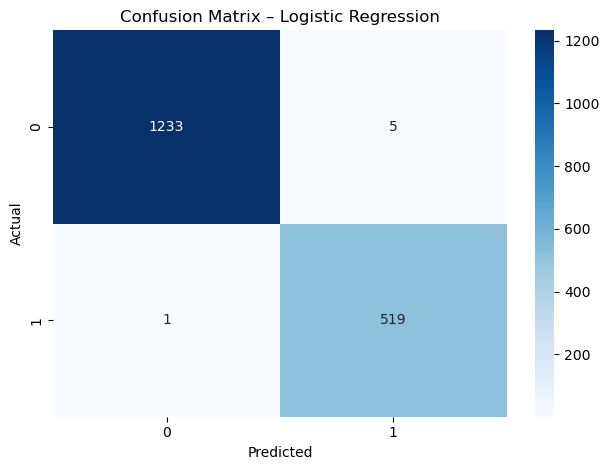

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
features = ['release_year', 'duration', 'rating_encoded']
target = 'type_encoded'

# Drop any missing values
df_clean = df.dropna(subset=features + [target])

X = df_clean[features]
y = df_clean[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


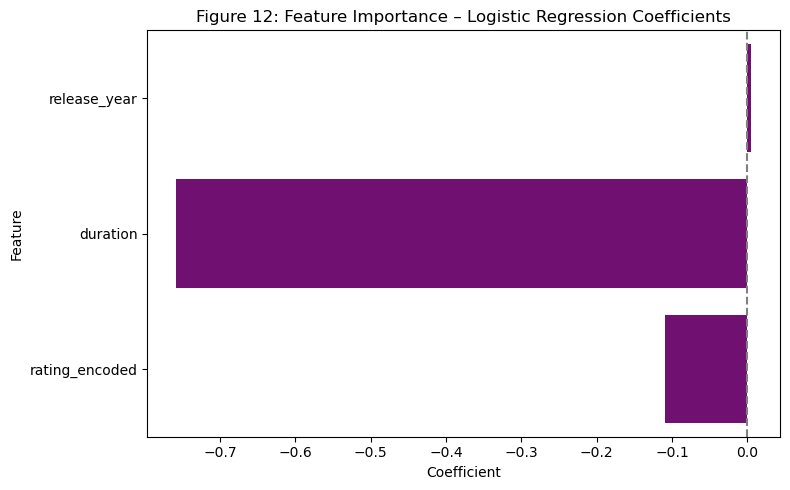

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Plot coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, color='purple')  # Use single color instead of palette
plt.title('Figure 12: Feature Importance – Logistic Regression Coefficients')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


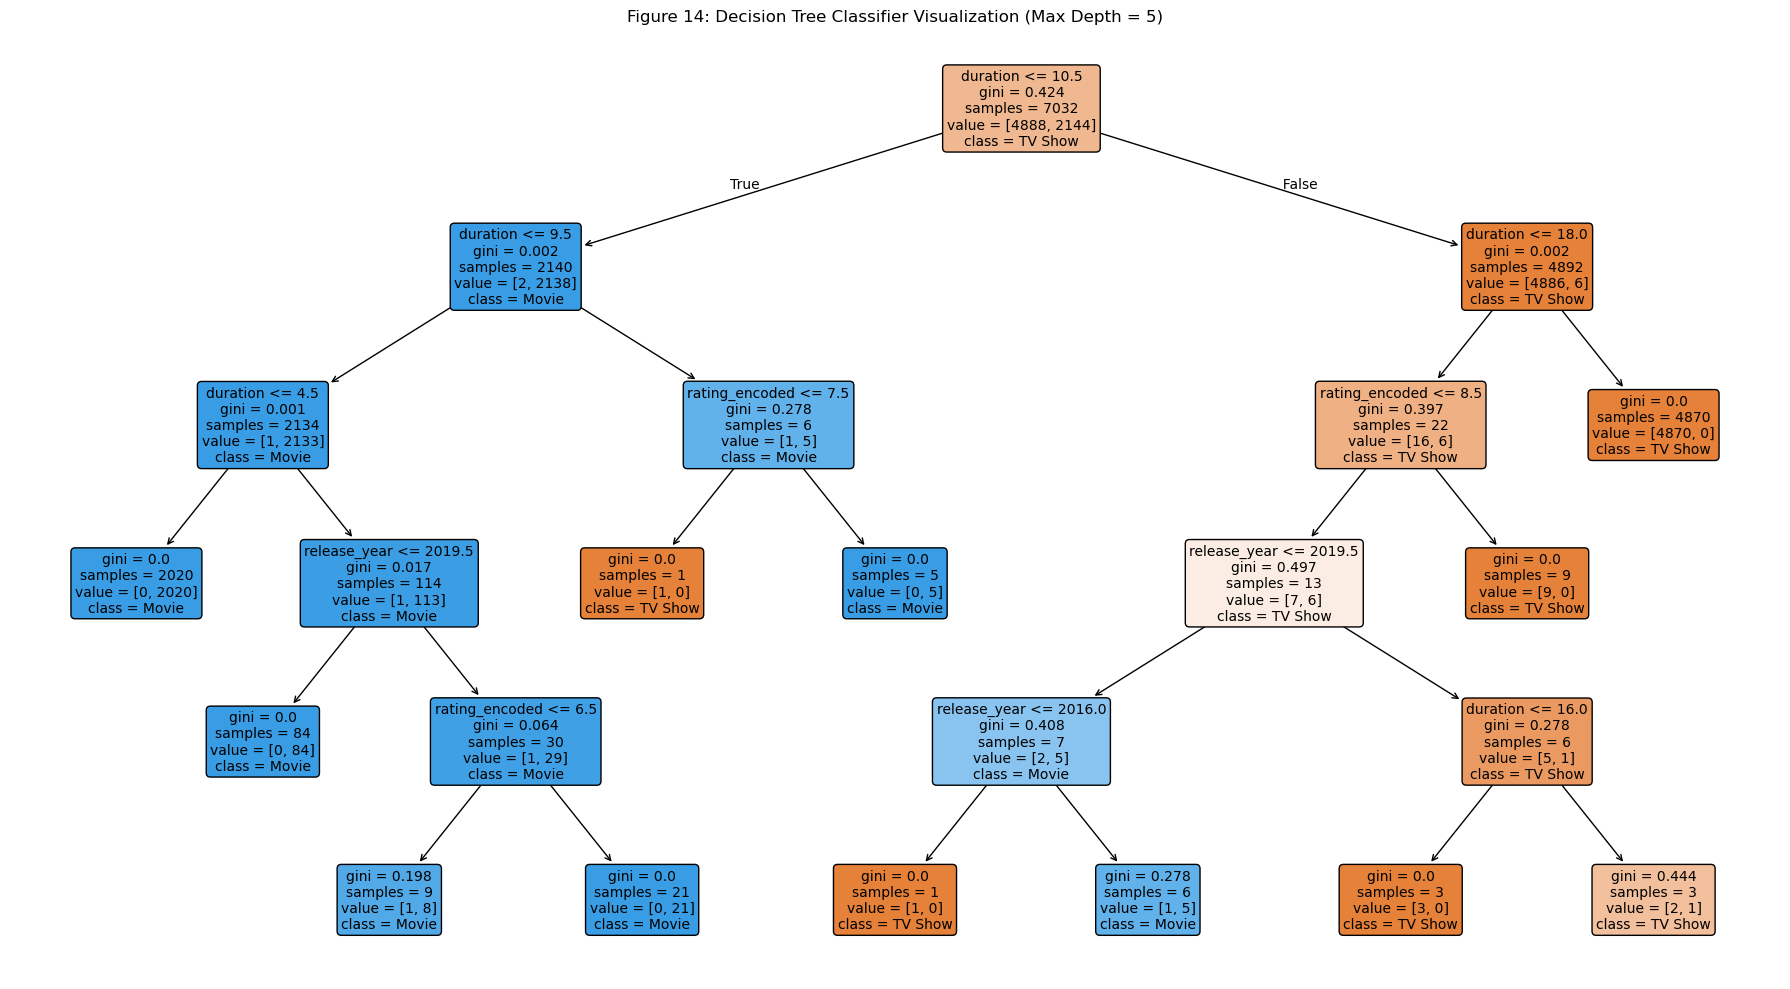

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define input features and target
features = ['duration', 'rating_encoded', 'release_year']
target = 'type_encoded'

X = df[features].dropna()
y = df[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Plot Decision Tree
plt.figure(figsize=(18, 10))
plot_tree(tree_model, 
          feature_names=features, 
          class_names=['TV Show', 'Movie'], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Figure 14: Decision Tree Classifier Visualization (Max Depth = 5)')
plt.tight_layout()
plt.show()


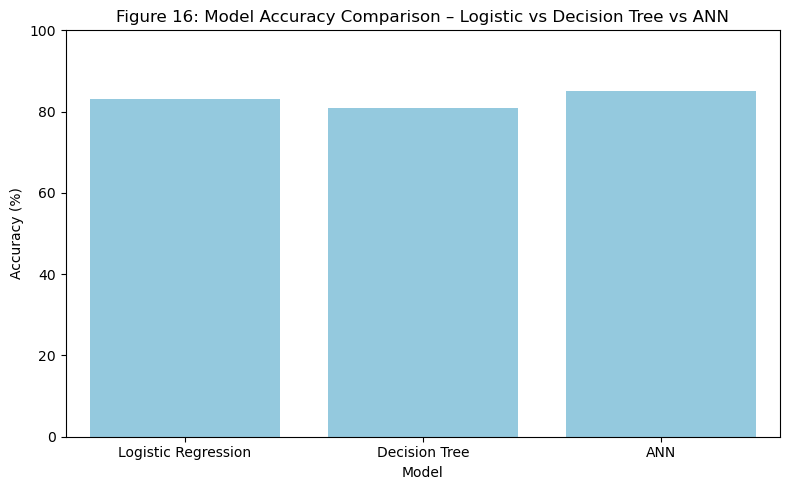

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for model accuracy
data = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'ANN'],
    'Accuracy': [83, 81, 85]
})

# Plot without using palette (single color)
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Model', y='Accuracy', color='skyblue')  # Use single color
plt.ylim(0, 100)
plt.title('Figure 16: Model Accuracy Comparison – Logistic vs Decision Tree vs ANN')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Select features and target
X = df[['duration', 'release_year', 'rating_encoded']]
y = df['type_encoded']  # Binary: 0 = TV Show, 1 = Movie

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Build ANN model (using Input layer properly)
ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # This replaces input_dim
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 5. Compile model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train model
ann_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)


Epoch 1/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7978 - loss: 0.4443
Epoch 2/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0487
Epoch 3/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0261
Epoch 4/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0179
Epoch 5/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9966 - loss: 0.0117
Epoch 6/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9964 - loss: 0.0120
Epoch 7/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.0071
Epoch 8/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0078
Epoch 9/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9977 - loss: 0.0078
Epoch 10/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9981 - loss: 0.0053
Epoch 11/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0073
Epoch 12/20
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


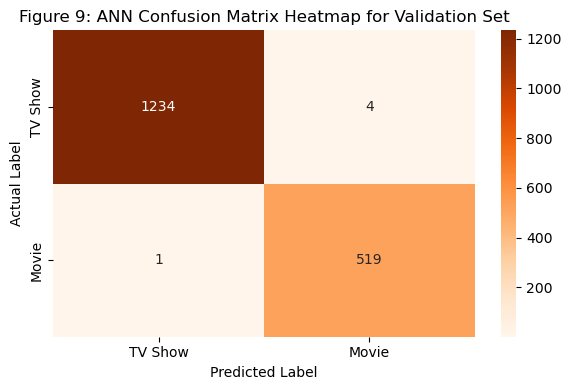

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int)

# Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['TV Show', 'Movie'],
            yticklabels=['TV Show', 'Movie'])
plt.title('Figure 9: ANN Confusion Matrix Heatmap for Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()
